# Imports

In [39]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
import PIL
import PIL.Image

# Data Loading

In [24]:
#https://keras.io/api/data_loading/

train_ds = keras.utils.image_dataset_from_directory(
    directory='coin_dataset/coins_images/currency_recognition',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(128, 128))


Found 1229 files belonging to 6 classes.


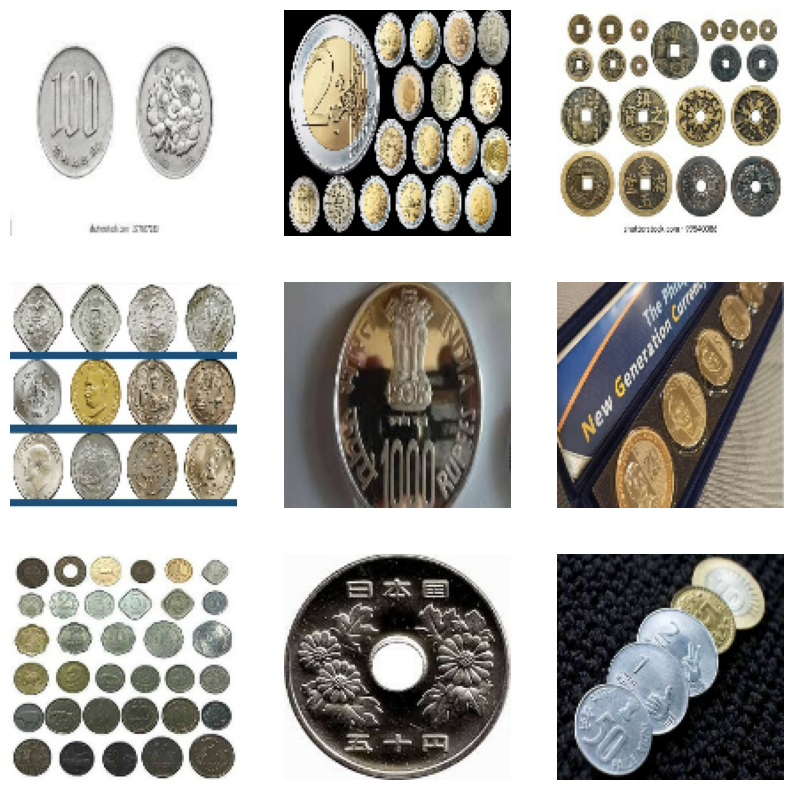

In [41]:
#https://www.tensorflow.org/tutorials/load_data/images

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")
